In [1]:
from google.colab import files
myfile = files.upload()

Saving input.txt to input.txt


In [19]:
f = open(file='/content/input.txt')
line = f.readline()
num_process = 0
while line:
  process = line.split(' ')
  print(process[0],process[1],process[2])
  
  line = f.readline()
  num_process = num_process+1

print(num_process)

3 5 10

0 4 12

1 1 8

5 3 15

6 7 20

8 2 14

10 17 41

13 75 100

35 50 150

4 250 130

21 130 255

19 100 200

12


In [20]:
f2 = open(file='/content/input.txt')
line = f2.readline()
arr = [[0]*4 for i in range(num_process)]

while line:
  for i in range(0,num_process):
    for j in range(0,3):
      arr[i][0] = i
      process = line.split(' ')
      arr[i][j+1] = process[j].strip()
    line = f2.readline()

for i in range(0, num_process):
  for j in range(0, 4):
    arr[i][j] = int(arr[i][j])

arr.sort(key=lambda x: x[1])

print(arr)

[[1, 0, 4, 12], [2, 1, 1, 8], [0, 3, 5, 10], [9, 4, 250, 130], [3, 5, 3, 15], [4, 6, 7, 20], [5, 8, 2, 14], [6, 10, 17, 41], [7, 13, 75, 100], [11, 19, 100, 200], [10, 21, 130, 255], [8, 35, 50, 150]]


In [21]:
w_time = 0
for k in range(0,num_process):
  w_time = w_time + arr[k][2]

print(w_time)

644


In [22]:
time_quantum = int(input('time_quantum : '))
print(time_quantum)

time_quantum : 180
180


time quantum :  180
[[(5, 5)], [(0, 4)], [(4, 1)], [(190, 3)], [(193, 7)], [(200, 2)], [(202, 17)], [(219, 75)], [(524, 50)], [(10, 180), (574, 70)], [(394, 130)], [(294, 100)]]


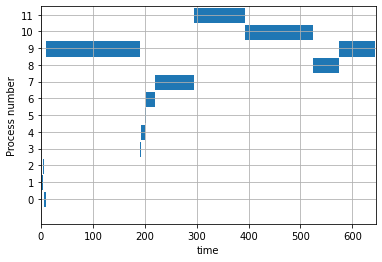

In [23]:
# Importing the matplotlb.pyplot
import matplotlib.pyplot as plt
  
# Declaring a figure "gnt"
fig, gnt = plt.subplots()
  
# Setting Y-axis limits
gnt.set_ylim(0, 10*(num_process+1))
  
# Setting X-axis limits
gnt.set_xlim(0, w_time+1)
  
# Setting labels for x-axis and y-axis
gnt.set_xlabel('time')
gnt.set_ylabel('Process number')

num_arr = [0]*num_process  
for i in range(0,num_process):
  num_arr[i] = i

tick_arr = [0]*num_process
for j in range(0,num_process):
  tick_arr[j] = 15+10*j

# Setting ticks on y-axis
gnt.set_yticks(tick_arr)
# Labelling tickes of y-axis
gnt.set_yticklabels(num_arr)
  
# Setting graph attribute
gnt.grid(True)

# print(arr)
print("time quantum : ", time_quantum)


arr_time = [[] for _ in range(num_process)]
i = 0

while i < w_time:
  for p in arr:
    if p[2] > time_quantum:
      arr_time[p[0]].append((i, time_quantum))
      i += time_quantum
      p[2] -= time_quantum
    elif 0 < p[2] <= time_quantum:
      arr_time[p[0]].append((i, p[2]))
      i += p[2]
      p[2] = 0
      
print(arr_time)



for i in range(0,num_process):
  # print(arr_time[i])
  gnt.broken_barh(arr_time[i],(10+10*i, 9))


  
plt.savefig("gantt.png")